In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


In [58]:
train = pd.read_csv('/content/drive/MyDrive/DS/Housing/train.csv', index_col='Id')
test = pd.read_csv('/content/drive/MyDrive/DS/Housing/test.csv', index_col='Id')

In [59]:
htrain = train.copy()
htest = test.copy()

In [60]:
print(htrain.shape, htest.shape)

(1460, 80) (1459, 79)


In [61]:
htrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
htrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We can see from info that there are columns which have more than 1000 null values out of 1460 entries.

In [63]:
# Deleting Columns with more than 1000 null values
def del_cols(data):
  columns = ['Alley','PoolQC','Fence','MiscFeature']
  data = data.drop(columns=columns)
  return data

In [64]:
htrain = del_cols(htrain)
htest = del_cols(htest)

In [65]:
for i in htrain.columns:
  if htrain[i].isnull().sum()>0:
    print(i, htrain[i].isnull().sum(), htrain[i].dtype)

LotFrontage 259 float64
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object


From the above observation, we can see that there are a few columns, both numerical and categorical variables, that have nan values. 

We will fill the missing categorical values with the most occuring in the column. And numerical values with the rounded mean values of their respective columns. 

In [66]:
def cat_cols_fill(data):
  for i in data.columns:
    if data[i].dtypes==object:
      #print(htrain[i].value_counts().index[0])
      data[i]=data[i].fillna(data[i].value_counts().index[0])
    elif data[i].dtypes!=object:
      data[i]=data[i].fillna(round(data[i].mean()))

  return data


In [67]:
htrain = cat_cols_fill(htrain)
htest = cat_cols_fill(htest)

EDA and Visualisation

Text(0.5, 1.0, 'Correlation Heatmap')

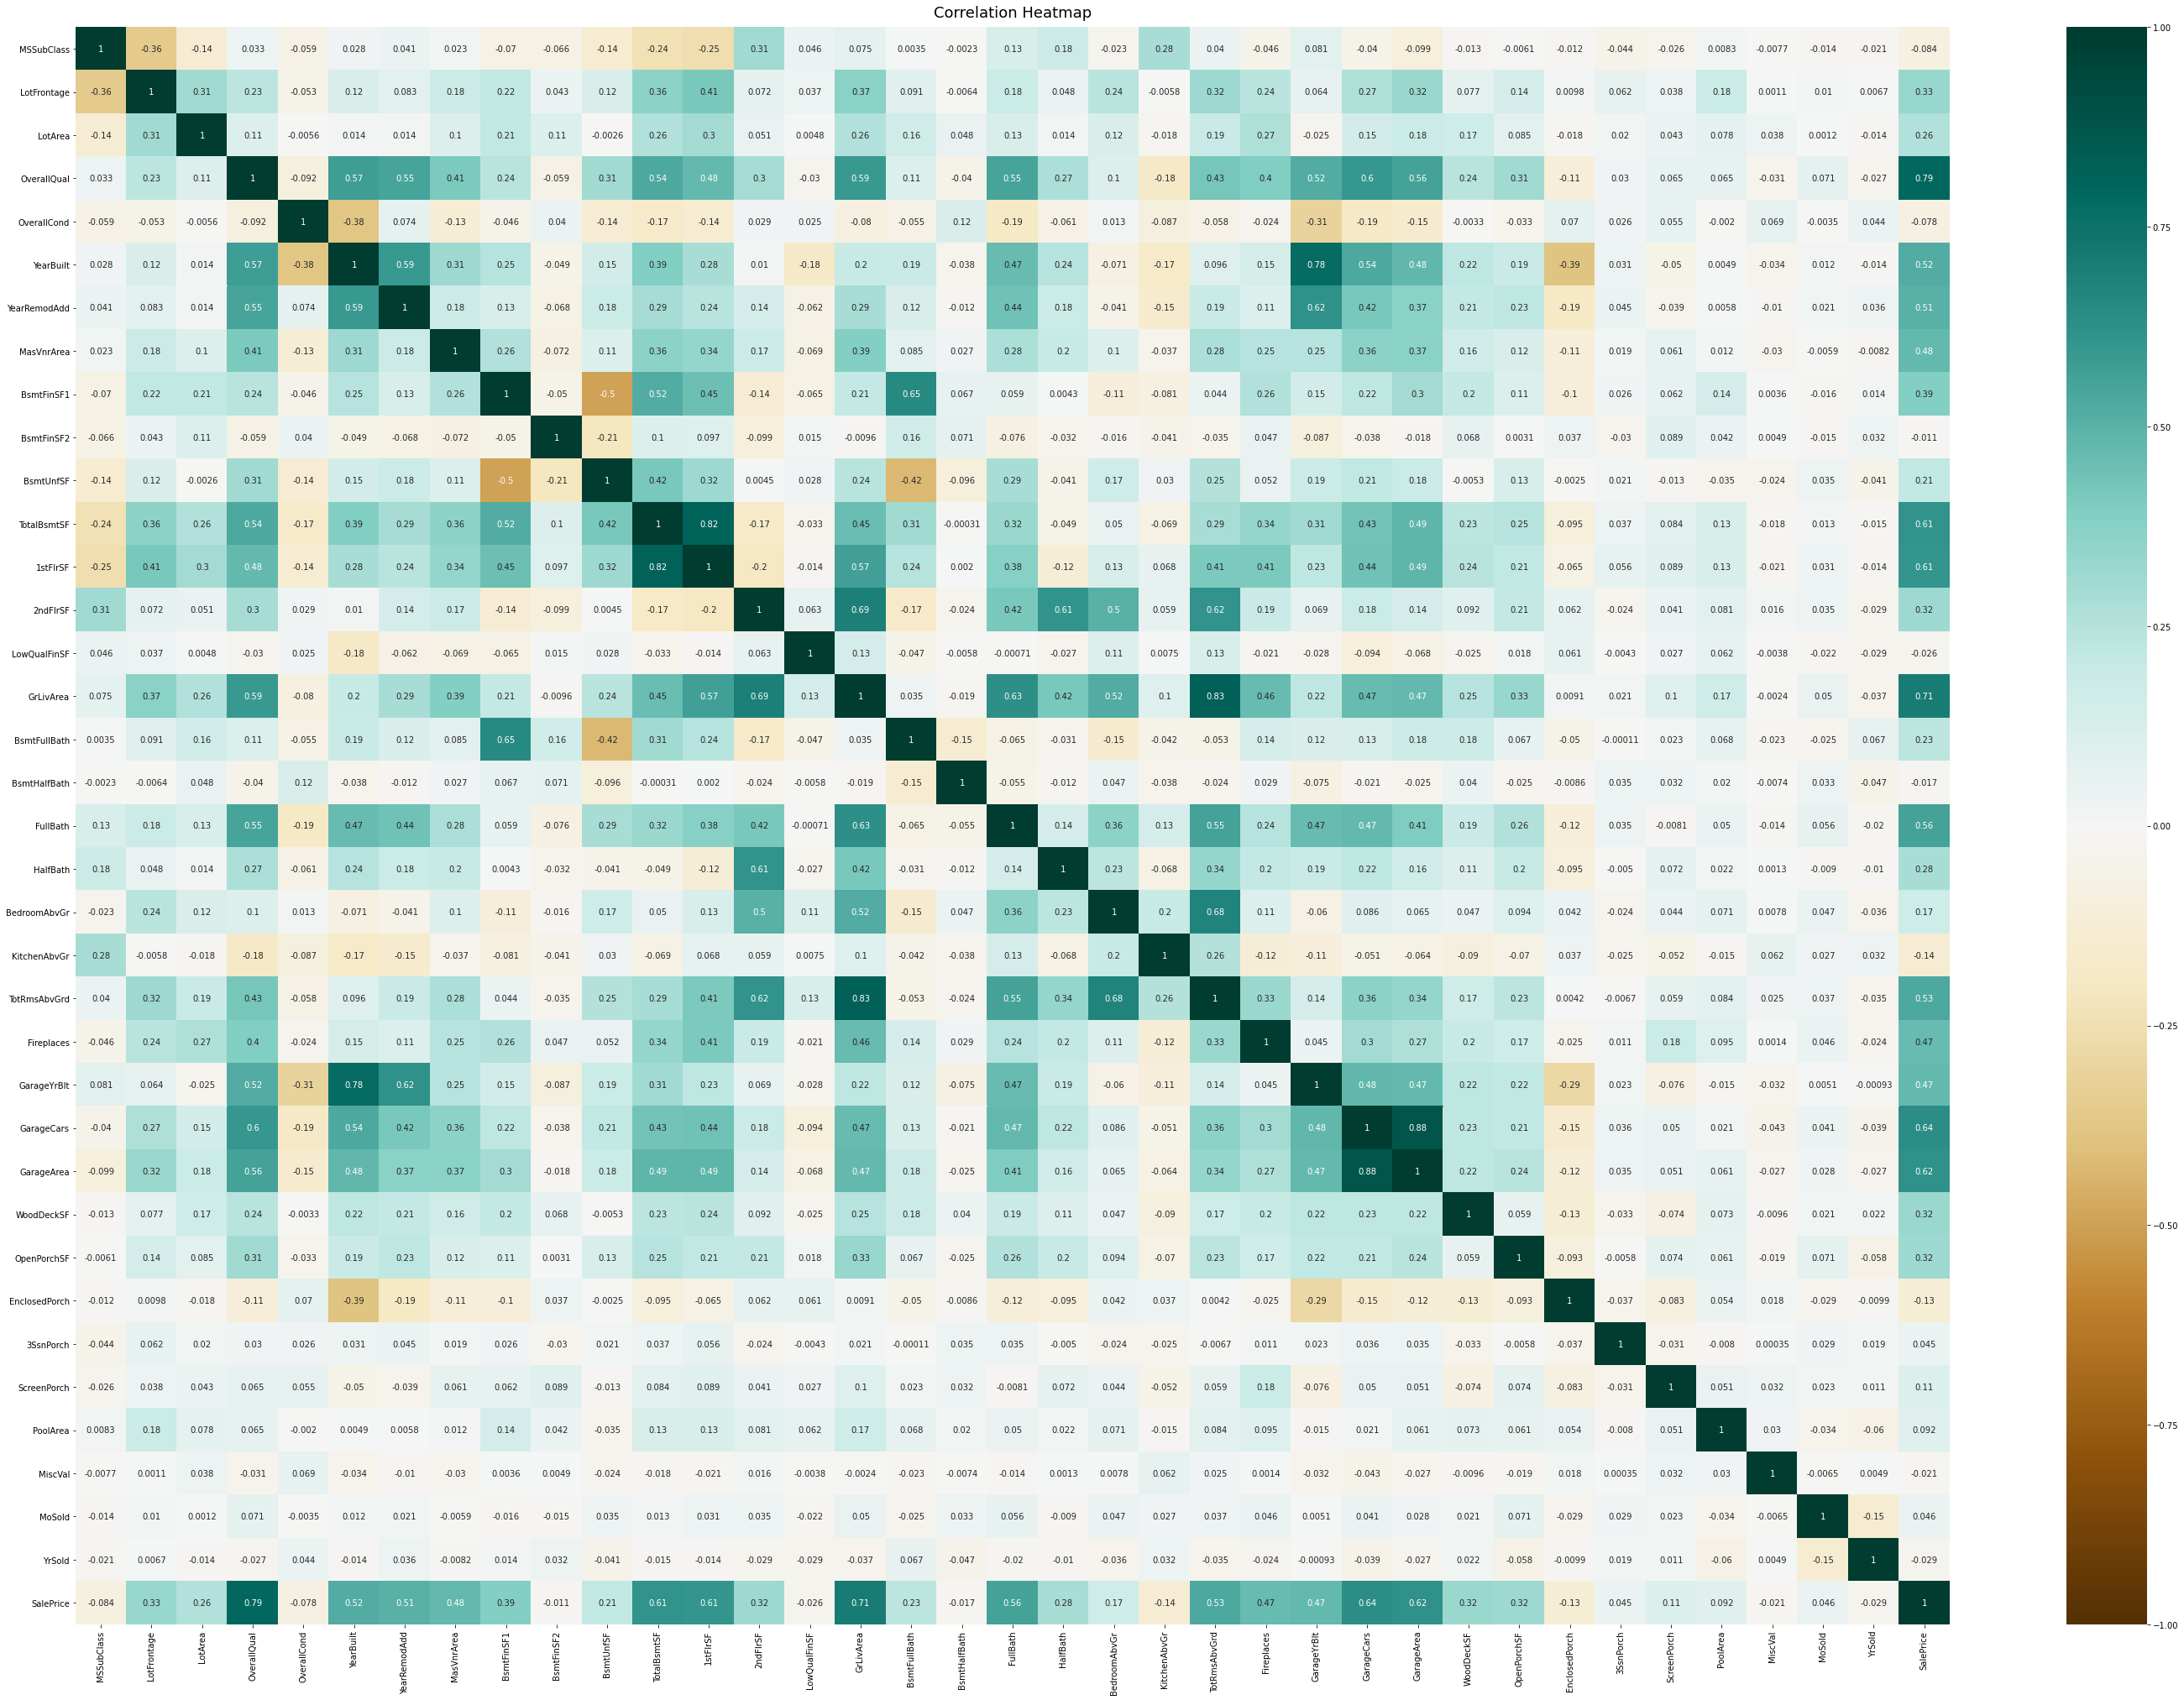

In [68]:
#Generating the heatmap to narrow the observations down
plt.figure(figsize=(50, 35))
heatmap = sns.heatmap(htrain.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [69]:
correlation_values = []
correlation_column = []
for i in htrain.columns:
  if htrain[i].dtypes!=object:
    sale = htrain['SalePrice']
    corr_col = htrain[i]
    correlation = corr_col.corr(sale)
    correlation_values.append(correlation)
    correlation_column.append(i)

In [70]:
corr_df = pd.DataFrame({"Values":correlation_values, "Name": correlation_column})
corr_df = corr_df.sort_values(by=['Values'])
corr_df

,Values,Name
21,-0.135907,KitchenAbvGr
29,-0.128578,EnclosedPorch
0,-0.084284,MSSubClass
4,-0.077856,OverallCond
35,-0.028923,YrSold
14,-0.025606,LowQualFinSF
33,-0.021190,MiscVal
17,-0.016844,BsmtHalfBath
9,-0.011378,BsmtFinSF2
30,0.044584,3SsnPorch


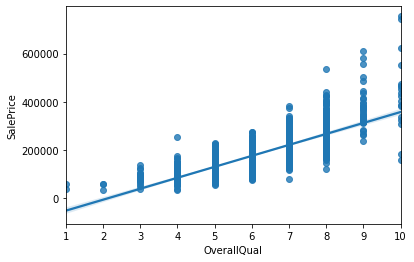

In [71]:
sns.regplot(x='OverallQual', y='SalePrice', data=htrain)

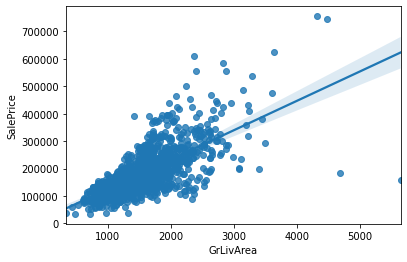

In [72]:
sns.regplot(x='GrLivArea', y='SalePrice', data=htrain)

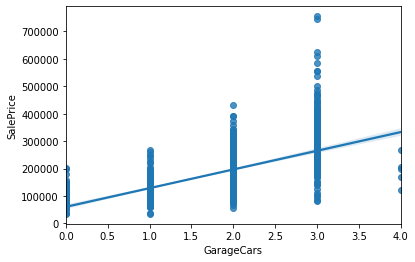

In [73]:
sns.regplot(x='GarageCars', y='SalePrice', data=htrain)

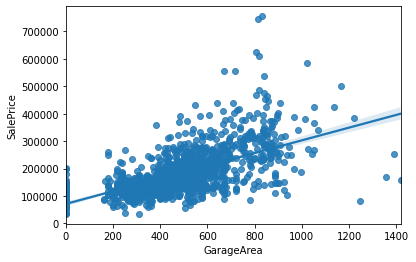

In [74]:
sns.regplot(x='GarageArea', y='SalePrice', data=htrain)

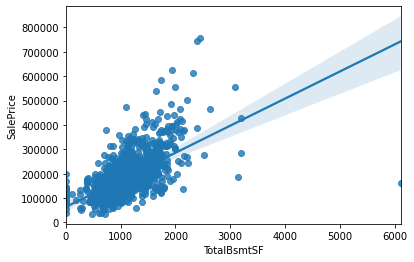

In [75]:
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=htrain)

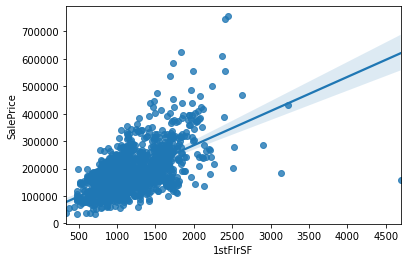

In [76]:
sns.regplot(x='1stFlrSF', y='SalePrice', data=htrain)

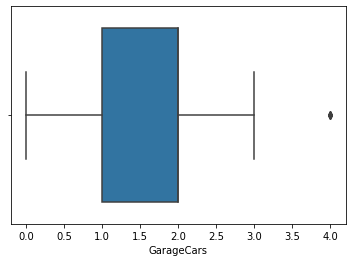

In [77]:
sns.boxplot(x=htrain['GarageCars'])

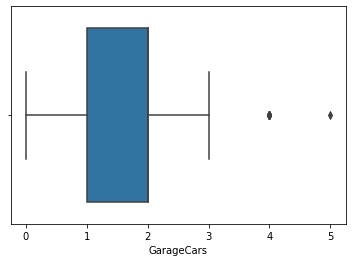

In [78]:
sns.boxplot(x=htest['GarageCars'])

By the above observation for a few columns on both train and test data, we can see that there are no specific outliers only in train dataset to remove. 

In [79]:
print(htrain.shape,htest.shape)

(1460, 76) (1459, 75)


Performing One Hot Encoding for the features

In [80]:
train_cols = []
train_cols2 = []
test_cols = []
test_cols2 = []
for i in htrain.columns:
  if htrain[i].dtype==object:
    train_cols.append(i)
    train_cols2.append(len(htrain[i].unique()))

for j in htest.columns:
  if htest[j].dtype==object:
    test_cols.append(j) 
    test_cols2.append(len(htest[j].unique()))


ctu = pd.DataFrame({"TrainNames":train_cols, "TrainValues": train_cols2, "TestNames":test_cols, "TestValues": test_cols2})
ctu

diff_cols = []
for row in ctu.iterrows():
  if row[1][1] != row[1][3]:
    diff_cols.append(row[1][2])

diff_cols
  

['Utilities',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Heating',
 'Electrical',
 'GarageQual']

The above features will be missing in the test data, and we need to add those features through one hot encoding and giving them 0 value so as to maintain the equal number of features in both train and test data

In [81]:
def one_hot_encoding(data):
  cat_cols=[]
  for i in data.columns:
    if data[i].dtypes == object:
      cat_cols.append(i)
  
  
  one_hot_cols = cat_cols
  for x in one_hot_cols:
    one_hot = pd.get_dummies(data[x], prefix=x)
    data = data.drop(x, axis=1)
    data = data.join(one_hot)

  return data

In [82]:
htrain = one_hot_encoding(htrain)
htest = one_hot_encoding(htest)

In [85]:
#Adding the missing features to the test data and giving the value 0 to that feature
traincols = htrain.columns
testcols = htest.columns
print(addcols)
addcols =  [x for x in traincols if x not in testcols]
htest[addcols] = 0 
htest.drop(['SalePrice'], axis=1, inplace=True)

['SalePrice', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex']


In [86]:
print(htrain.shape,htest.shape)

(1460, 276) (1459, 275)


Modeling

In [87]:
#Splitting the data
y = htrain['SalePrice']
X = htrain.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [88]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1022, 275) (438, 275) (1022,) (438,)


In [89]:
reg = LinearRegression().fit(X, y)

In [90]:
y_pred = reg.predict(X_test)

In [91]:
mean_squared_log_error(y_test, y_pred)

0.012392310355834988

Checking a couple of Ensemble models too

In [92]:
regG = ensemble.GradientBoostingRegressor()
regG.fit(X_train, y_train)
y_predxG = regG.predict(X_test)

In [93]:
mean_squared_log_error(y_test, y_predxG)

0.019312724869110193

In [94]:
regF = RandomForestRegressor(max_depth=10, random_state=0)
regF.fit(X_train, y_train)
y_predF = regF.predict(X_test)

In [95]:
mean_squared_log_error(y_test, y_predF)

0.023117617229283505

Applying the Gradient Boosting Regressor model for the test data

In [109]:
y_test_pred = regG.predict(htest)

In [113]:
final_test = pd.DataFrame({"SalePrice": y_test_pred})

In [114]:
final_test.head()

,SalePrice
0,118830.384803
1,168578.895210
2,177432.474570
3,185675.376883
4,202964.954015


In [116]:
final_test.to_csv("/content/drive/MyDrive/DS/Housing/Housing_Prediction_Submission.csv", index=False)